In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
df.shape

(25, 2)

In [5]:
df.count()

Hours     25
Scores    25
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


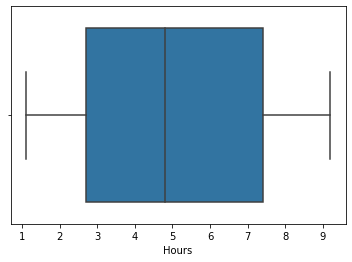

In [7]:
sns.boxplot('Hours',data=df)

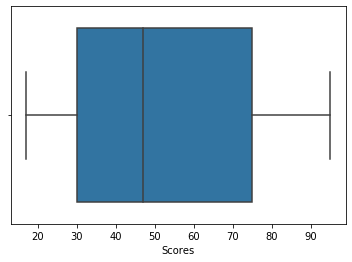

In [8]:
sns.boxplot('Scores',data=df)

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


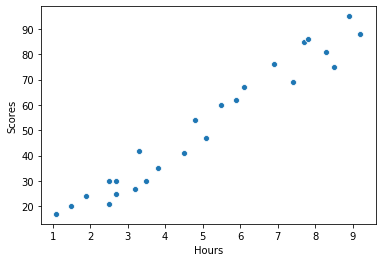

In [10]:
sns.scatterplot('Hours',"Scores",data=df)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [12]:
x = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(regressor.coef_)
print(regressor.intercept_)

[[10.46110829]]
[-1.53695733]


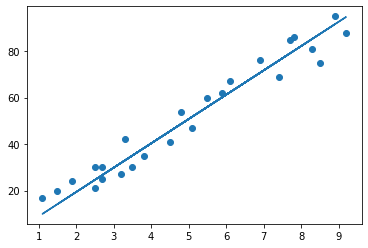

In [16]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [17]:
y_pred=regressor.predict(x_test)
df1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df1

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


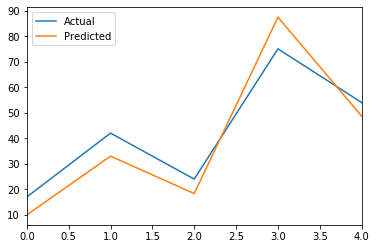

In [18]:
df1.plot(kind='line')

In [19]:
# You can also test with your own data
own_pred = regressor.predict([[9.25]])
print("No of Hours = 9.25")
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [95.22829438]


In [20]:
from sklearn import metrics 

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2_score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 7.882398086270432
R2_score: 0.8421031525243527
